In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import geopandas as gpd
 
from weavingspace import WeaveUnit
from weavingspace import Tiling

from weavingspace import tiling_utils

import shapely.affinity as affine

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Triaxial weave

In [3]:
w2_a1 = WeaveUnit(
  weave_type = "cube", spacing = 50000, aspect = .8,
  strands = "a|b|c", crs = ak.crs).transform_rotate(20).inset_elements(1000)
# w2_a09 = WeaveUnit(weave_type = "cube", spacing = 100, aspect = .9,
#                   strands = "a|b|c", crs = ak.crs, debug = True)

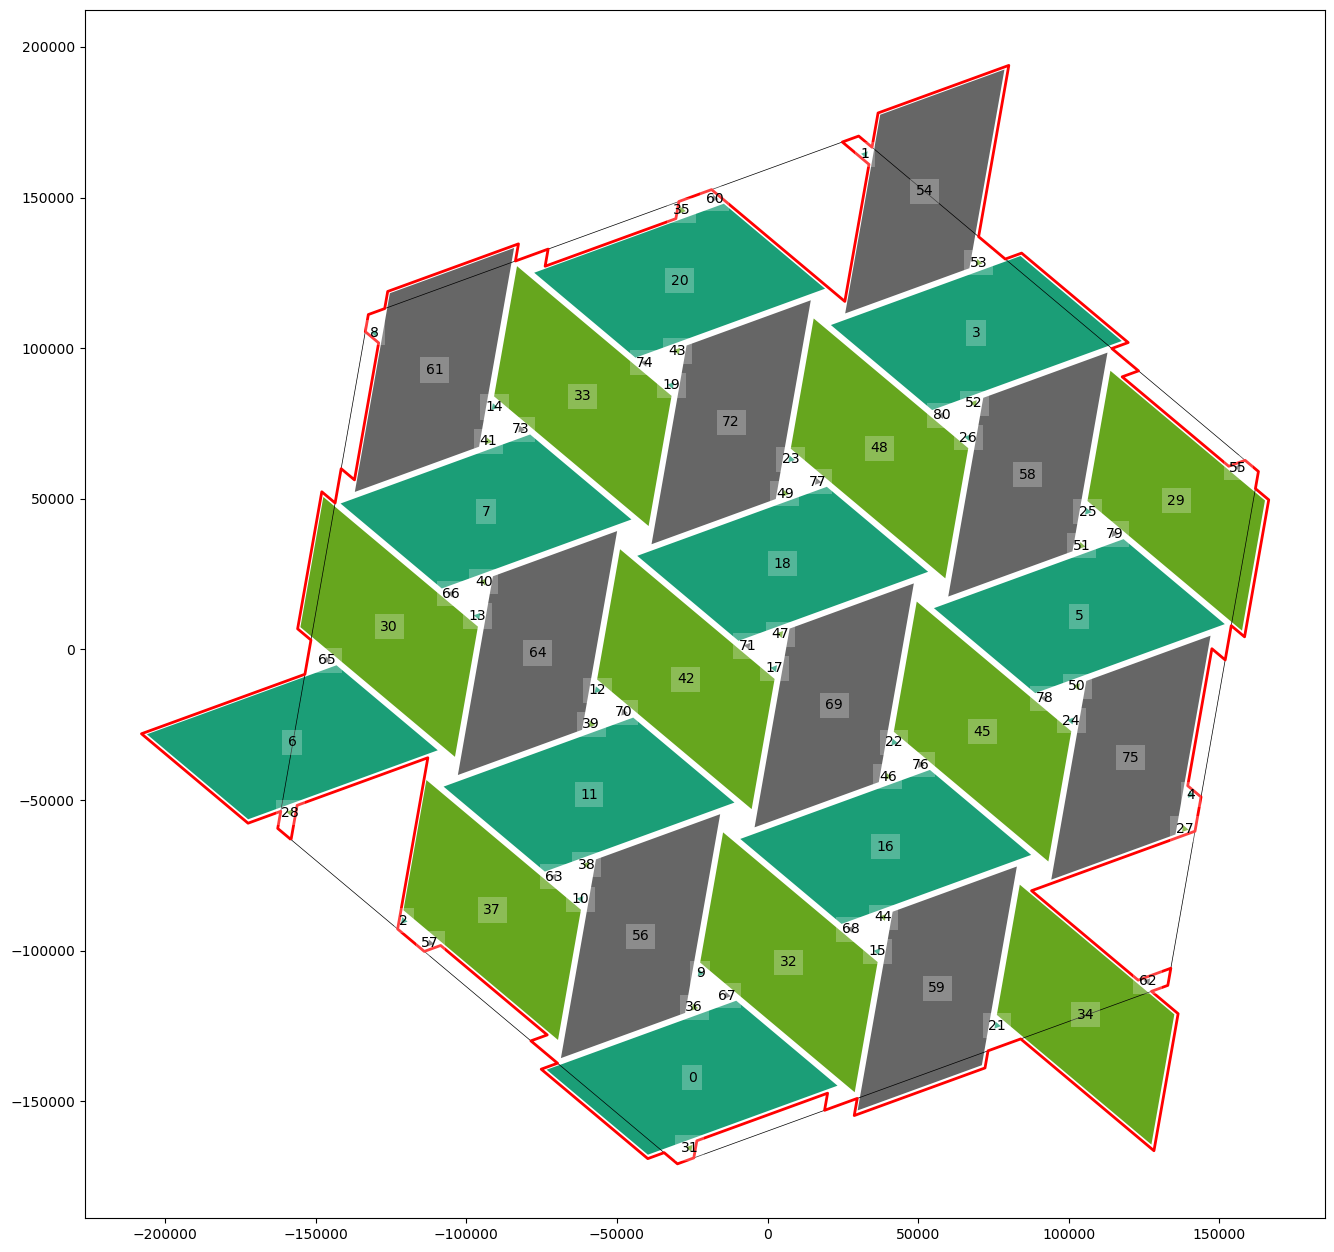

In [4]:
ax = w2_a1.plot(r = 0, figsize = (16, 16), show_reg_tile = True, 
                show_ids = "id")

<Axes: >

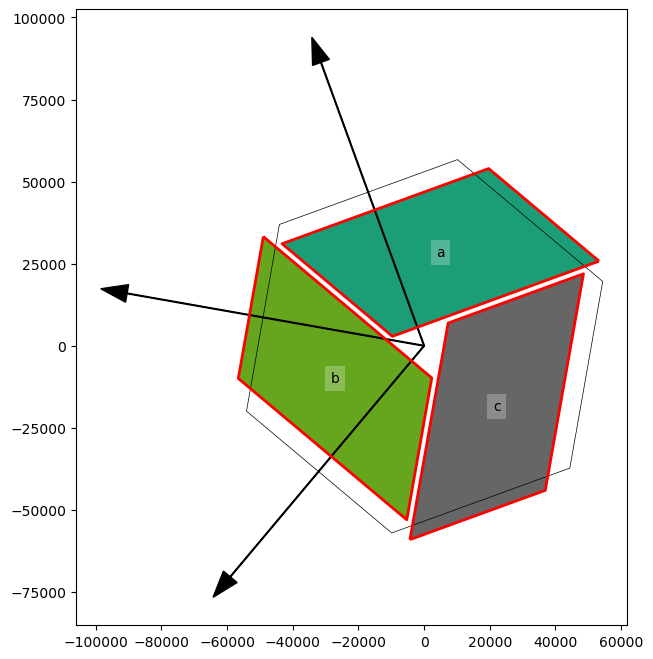

In [5]:
import copy
w2 = copy.deepcopy(w2_a1)
w2.tile.geometry = w2_a1.tile.scale(1/3, 1/3)
w2.elements = w2_a1.elements.iloc[[18, 42, 69]]
w2.setup_vectors()
w2.setup_regularised_tile_from_elements()
w2.plot(show_vectors = True)